In [57]:
from pathlib import Path
from networkx import NetworkXError
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

ROOT = Path('../csv')

In [58]:
def init_graph():
    g = nx.Graph()
    df = pd.read_csv(ROOT/'edges.csv',delimiter=", ")
    edges = ["{} {}".format(row['source'], row['target']) for _, row in df.iterrows() ]
    g = nx.parse_edgelist(edges, nodetype=int, create_using=g)

    df = pd.read_csv(ROOT/'nodes.csv',delimiter=",", usecols=['code'])
    node_labels = df['code']
    mapping = {k: v for k, v in enumerate(node_labels)}
    g = nx.relabel_nodes(g, mapping)
    return g

In [92]:
def normalize(x, new_lower_bound, new_upper_bound):
    minim = min(x)
    maxim = max(x)
    old_range = maxim - minim
    new_range = new_upper_bound - new_lower_bound
    return [((a - minim) / old_range) * new_range + new_lower_bound for a in x]


def get_positions(infile):
    df = pd.read_csv(infile,delimiter=";")

    latts = list(df["latt"])
    longts = list(df["longt"])
    codes = list(df["code"])
        
    latts_norm = normalize(latts,-1,1)
    longts_norm = normalize(longts,-1,1)

    positions = list(zip(longts_norm,latts_norm))
    positions_dict = dict(zip(codes,positions))

    return positions_dict

def visualize_graph():
    g = init_graph()
    pos = get_positions(ROOT/'geodata.csv')

    centrality = nx.degree_centrality
    centrality_values = dict(centrality(g)).values()
    node_size = normalize(centrality_values,20,1000)
    fig, ax = plt.subplots(figsize=(30,20))
    nx.draw_networkx(g,ax=ax,font_size=15,node_size=node_size,pos=pos,edge_color='gray')
    plt.title(label="Betwenness (geoposition)")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


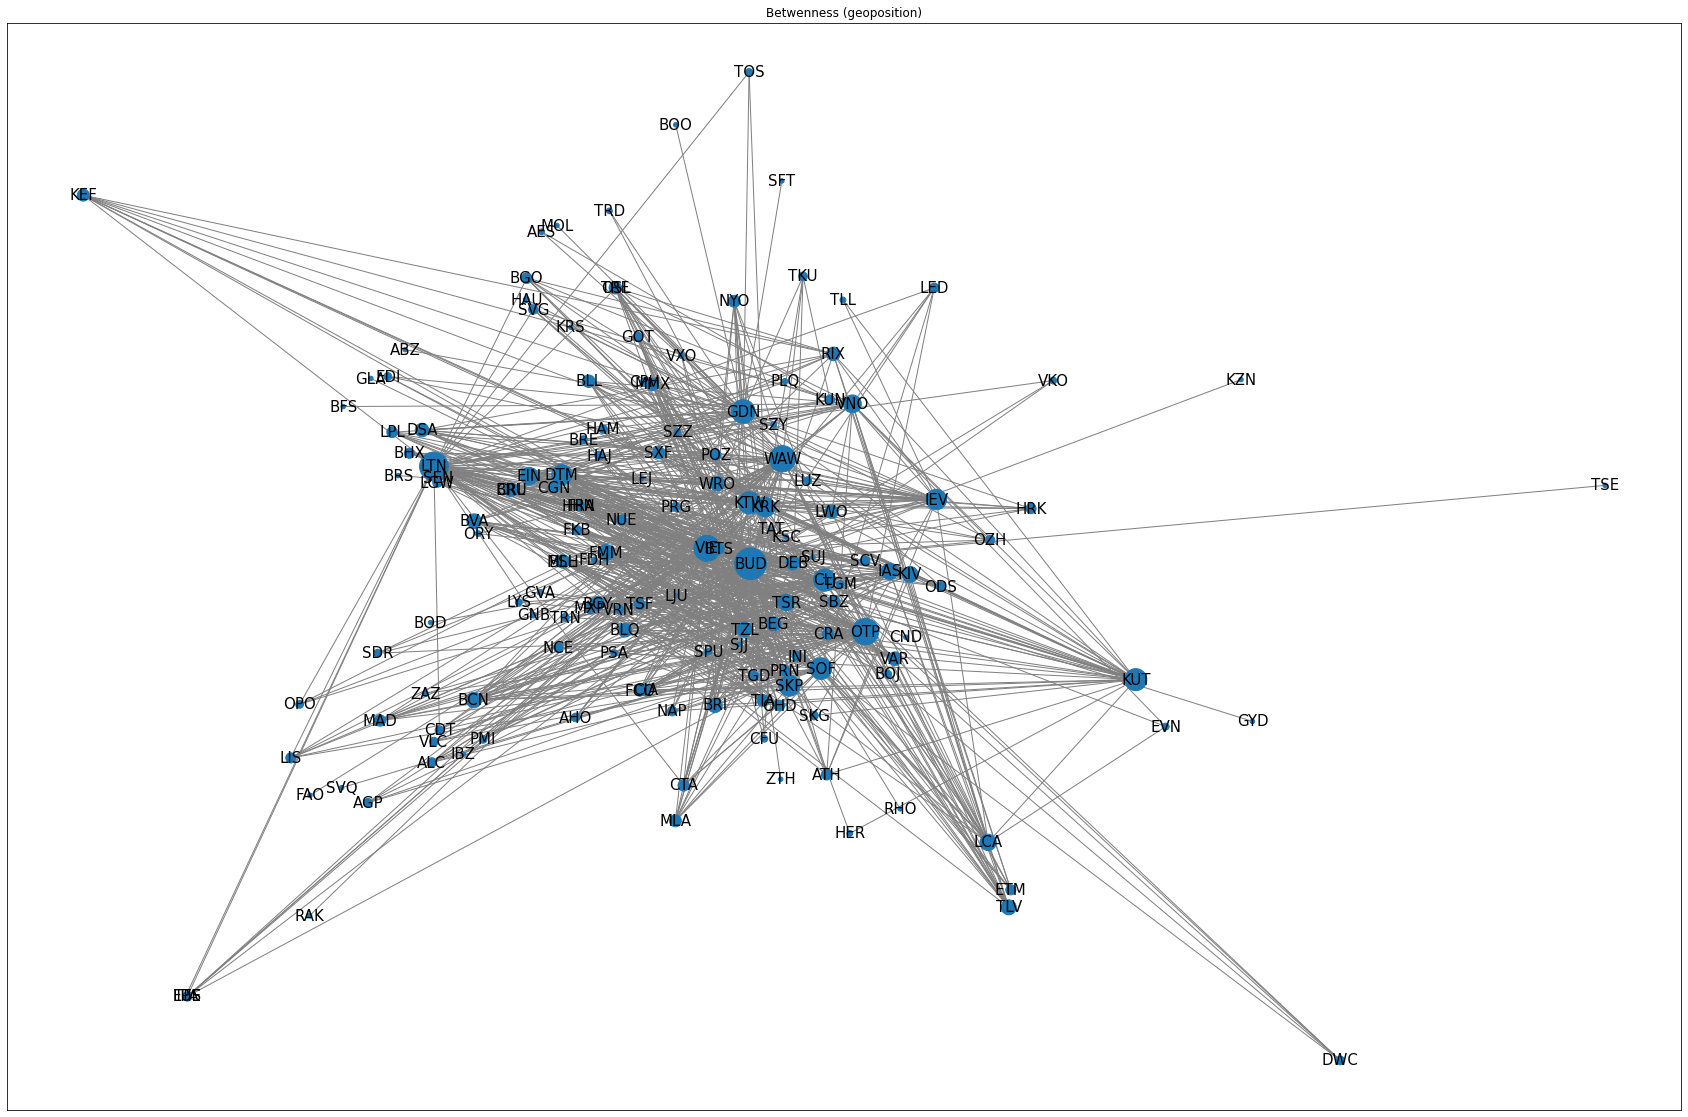

In [93]:
visualize_graph()